# 0.2.4B Gradiente descendente estocástico

Notas:
- 

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

In [5]:
import sys
sys.path.append("../../../../") 

import utils.paths as path
from utils.paths2 import direcciones

## 0.2.4.1 Definición del problema de estimación de parámetros

Se desean encontra los parámetros w0 y w1 del siguiente modelo de regresión entre las variables x y y:

$$ y_{i} = w_{i}x_{i} + w_{0} + e_{i} $$

a partir de un conjunto de observaciones ${d_{i}, x_{i}}$, donde $d_{i}$ es el valor real (observado), $y_{i}$ es su aproximación usando el modelo de regresión descrito, y $e_{i}$ es el error aleatorio.

In [6]:
#
# Datos del problema
#
x_sample = [
    0.6231,0.7460,0.1087,0.3654,0.3065,0.6886,
    0.4966,0.2618,0.7607,0.4424,0.7731,
]

y_sample = [
    1.6266,1.8508,0.9519,1.2828,1.2283,1.8722,
    1.4657,1.1097,1.7826,1.4267,1.8248,
]

## 0.2.4.2 Función de pérdida

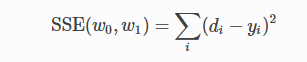

In [7]:
#
# Sumatoria del error cuadrático o pérdida cuadrática
#
def sse(w0, w1):
    y_forecasts = [w0 + w1 * x_value for x_value in x_sample]
    errors = [y_true - y_forecast for y_true, y_forecast in zip(y_sample, y_forecasts)]
    squared_errors = [error ** 2 for error in errors]
    return sum(squared_errors)

## 0.2.4.3 Aprendizaje Batch

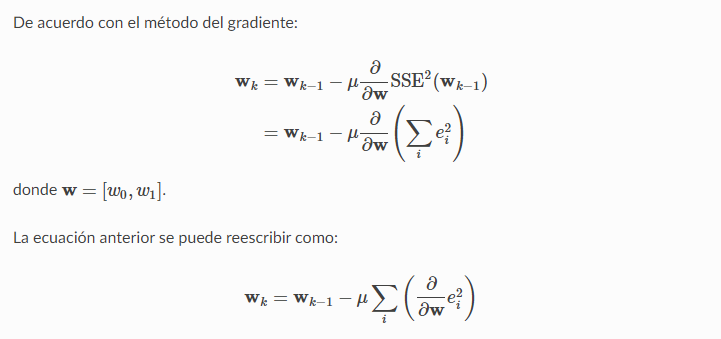

## 0.2.4.4 Aprendizaje online

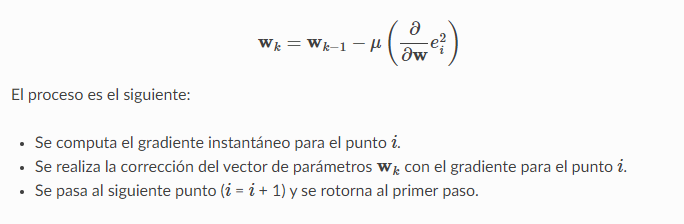

## 0.2.4.5 Derivadas

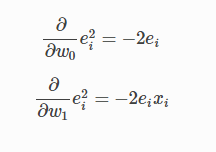

In [8]:
def gradient(w0, w1, x_value, y_value):

    error = y_value - w0 - w1 * x_value
    gradient_w0 = -2 * error
    gradient_w1 = -2 * error * x_value

    return gradient_w0, gradient_w1

## 0.2.4.6 Ecuación de mejora

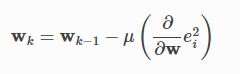

In [9]:
def improve(w0, w1, mu, x_value, y_value):

    gradient_w0, gradient_w1 = gradient(w0, w1, x_value, y_value)
    w0 = w0 - mu * gradient_w0
    w1 = w1 - mu * gradient_w1

    return w0, w1

## 0.2.4.7 Proceso iterativo

In [10]:
def plot_contour():

    W0 = np.linspace(0.0, 0.8, 50)
    W1 = np.linspace(2.4, 3.2, 50)
    W0, W1 = np.meshgrid(W0, W1)
    F = sse(W0, W1)

    levels = [0, 0.2, 0.5, 0.75, 1, 2, 3, 5, 10, 20, 40, 60]

    fig, ax = plt.subplots(figsize=(8, 8))

    ax.set_aspect("equal", "box")
    ax.contourf(W0, W1, F, cmap=cm.Greys, levels=levels, alpha=0.8)
    ax.contour(W0, W1, F, colors="gray", levels=levels)
    ax.grid()
    ax.set_xlabel("w0")
    ax.set_ylabel("w1")

 w0 = 0.2182
 w1 = 2.4538
SSE = 0.6216



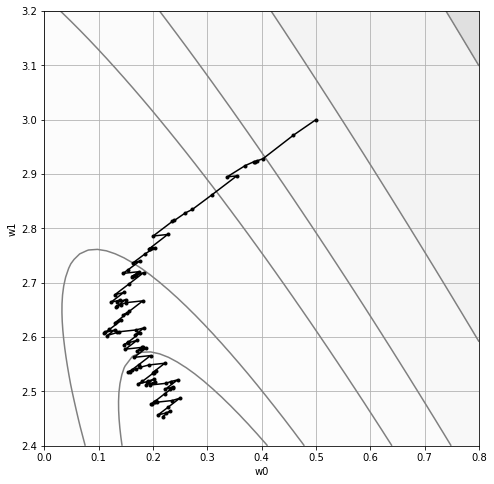

In [11]:
#
# Punto de inicio
#
w0 = 0.5
w1 = 3.0

history = {
    "w0": [w0],
    "w1": [w1],
    "sse": [sse(w0, w1)],
}

mu = 0.03

n_samples = len(x_sample)

for epoch in range(10):

    for n in np.random.choice(n_samples, n_samples, replace=False):

        w0, w1 = improve(w0, w1, mu, x_sample[n], y_sample[n])

        history["w0"].append(w0)
        history["w1"].append(w1)
        history["sse"].append(sse(w0, w1))

print(" w0 = {:6.4f}\n w1 = {:6.4f}\nSSE = {:6.4f}\n".format(w0, w1, sse(w0, w1)))

plot_contour()
plt.plot(history["w0"], history["w1"], marker=".", color="black");

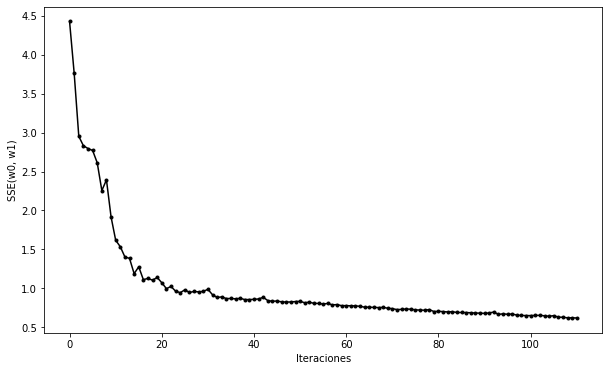

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(history["sse"], ".-k")
plt.xlabel("Iteraciones")
plt.ylabel("SSE(w0, w1)")
plt.show()

In [18]:
def epocas(w0, w1, epocas, learning_rate):
    
    history = { "w0": [w0], "w1": [w1], "sse": [sse(w0, w1)]}
    
    n_samples = len(x_sample)
    
    for epoch in range(epocas):
        for n in np.random.choice(n_samples, n_samples, replace=False):
            
            w0, w1 = improve(w0, w1, learning_rate, x_sample[n], y_sample[n])

            history["w0"].append(w0)
            history["w1"].append(w1)
            history["sse"].append(sse(w0, w1))

    #
    # Ultimo resultado obtenido
    #
    # print(" w0 = {:6.4f}\n w1 = {:6.4f}\nSSE = {:6.4f}\n".format(w0, w1, sse(w0, w1)))
    
    return history

In [34]:
history = epocas(0.5, 3.0, 10, 0.05)

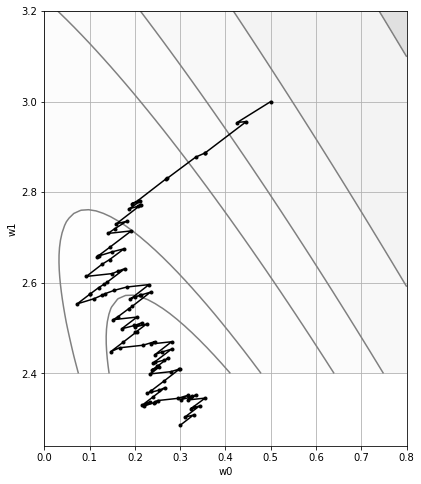

In [35]:
plot_contour()
plt.plot(history["w0"], history["w1"], marker=".", color="black")
plt.show()

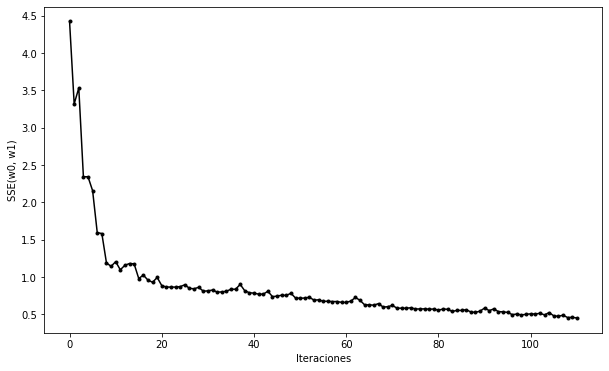

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(history["sse"], ".-k")
plt.xlabel("Iteraciones")
plt.ylabel("SSE(w0, w1)")
plt.show()

In [17]:
print('ok_')

ok_
